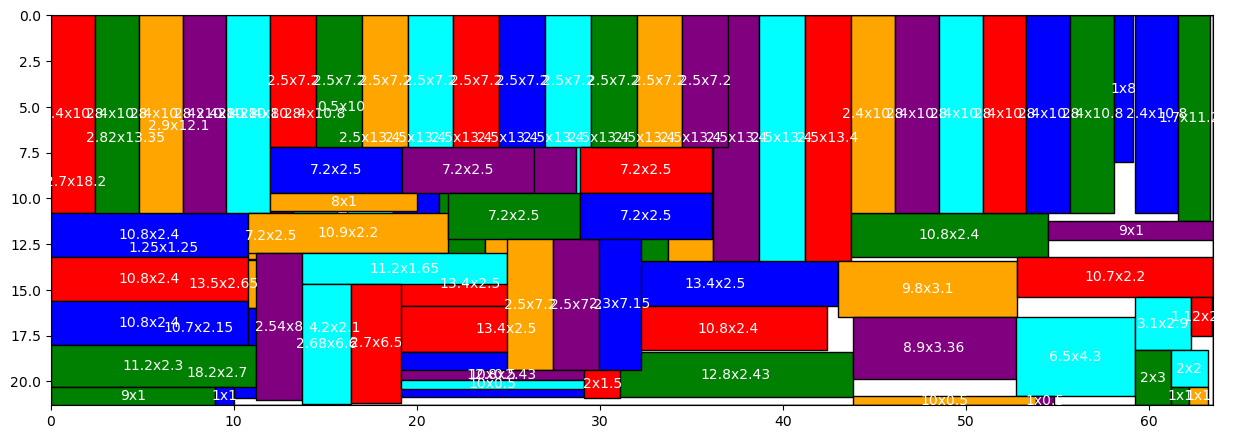

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from rectpack import newPacker

# Define the rectangles and bins
rectangles = [(7.2,2.5),(1.25,1.25),(7.2,2.5),(7.2,2.5),(7.2,2.5),(7.2,2.5),(13.4,2.5),(13.4,2.5),(13.4,2.5),(13.4,2.5),
              (12.8,2.43),(12.8,2.43),(7.2,2.5),(7.2,2.5),(7.2,2.5),(7.2,2.5),(7.2,2.5),(13.4,2.5),(13.4,2.5),(13.4,2.5),
              (13.4,2.5),(13.4,2.5),(13.4,2.5),(13.4,2.5),(13.4,2.5),(13.4,2.5),(13.4,2.5),(7.2,2.5),(7.2,2.5),(7.2,2.5),
              (7.2,2.5),(7.2,2.5),(7.2,2.5),(7.2,2.5),(7.2,2.5),(3.1,2.9),(8.9,3.36),(6.6,2.68),(6.5,2.7),(8,2.54),(7.15,2.3),
              (4.2,2.1),(9.8,3.1),(3,2),(6.5,4.3),(13.35,2.82),(10.8,2.4),(10.8,2.4),(10.8,2.4),(10.8,2.4),(10.8,2.4),(10.8,2.4),
              (10.8,2.4),(10.8,2.4),(10.8,2.4),(10.8,2.4),(10.8,2.4),(9,1),(1,1),(9,1),(11.2,1.65),(11.2,2.3),(1,1),
              (10.7,2.2),(8,1),(1,1),(8,1),(10.7,2.15),(2,1.5),(11.25,1.7),(2.1,1.12),(10.9,2.2),(13.5,2.65),(18.2,2.7),
              (18.2,2.7),(1,0.5),(2,2),(10.8,2.4),(10.8,2.4),(10.8,2.4),(10.8,2.4),(10.8,2.4),(10.8,2.4),(10.8,2.4),
              (10.8,2.4),(10.8,2.4),(10,0.5),(10,0.5),(10,0.5),(10,0.5),(12.1,2.9)
]
bins = [(63.5, 21.3), (63.5, 21.3), (5.8, 18.30), (5.8, 18.3)]

# Initialize the packer
packer = newPacker()

# Add the rectangles to the packing queue
for r in rectangles:
    packer.add_rect(*r)

# Add the bins where the rectangles will be placed
for b in bins:
    packer.add_bin(*b)

# Start packing
packer.pack()

# Plotting the results
fig, ax = plt.subplots(figsize=(15, 8))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

for abin in packer:
    bin_rect = Rectangle((0, 0), abin.width, abin.height, edgecolor='black', facecolor='none')
    ax.add_patch(bin_rect)
    for i, rect in enumerate(abin):
        color = colors[i % len(colors)]
        r = Rectangle((rect.x, rect.y), rect.width, rect.height, edgecolor='black', facecolor=color)
        ax.add_patch(r)
        ax.text(rect.x + rect.width / 2, rect.y + rect.height / 2, f"{rect.width}x{rect.height}",
                ha='center', va='center', color='white')

ax.set_xlim(0, max(b[0] for b in bins))
ax.set_ylim(0, max(b[1] for b in bins))
ax.set_aspect('equal')
plt.gca().invert_yaxis()
plt.show()